In [40]:
#Import the library
import pandas as pd

 1.Choose a binary classification dataset

In [41]:
#load the dataset
df=pd.read_csv('/content/data.csv')

In [42]:
#check the first 5 rows
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [43]:
#check the row & column no.
df.shape

(569, 33)

In [44]:
#check the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [45]:
#drop unnecessary columns
df=df.drop(columns=['id','Unnamed: 32'])

In [46]:
#convert diagnosis to binary (M=1, B=0)
df['diagnosis']=df['diagnosis'].map({'M': 1, 'B': 0})

2.Train/test split and standardize features.

In [47]:
#split features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
# Standardize features
scaler = StandardScaler()

In [52]:
X_train_scaled = scaler.fit_transform(X_train)

In [53]:
X_test_scaled = scaler.transform(X_test)

In [54]:
# Output the shapes
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

 3.Fit a Logistic Regression model

In [55]:
from sklearn.linear_model import LogisticRegression

In [58]:
# Create the logistic regression model instance
lr= LogisticRegression(random_state=42, max_iter=10000)

In [59]:
# Fit the model on training data
lr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [60]:
# Predict on the test set
y_pred = lr.predict(X_test_scaled)

4.Evaluate with confusion matrix, precision, reca l, ROC-AUC.

In [61]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay

In [65]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

In [68]:
print("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[70  1]
 [ 2 41]]


In [69]:
# Generate classification report for precision, recall, f1-score
cr= classification_report(y_test, y_pred, output_dict=True)

In [71]:
print("Classification Report:\n",cr)

Classification Report:
 {'0': {'precision': 0.9722222222222222, 'recall': 0.9859154929577465, 'f1-score': 0.9790209790209791, 'support': 71.0}, '1': {'precision': 0.9761904761904762, 'recall': 0.9534883720930233, 'f1-score': 0.9647058823529412, 'support': 43.0}, 'accuracy': 0.9736842105263158, 'macro avg': {'precision': 0.9742063492063492, 'recall': 0.9697019325253848, 'f1-score': 0.9718634306869601, 'support': 114.0}, 'weighted avg': {'precision': 0.9737190197716513, 'recall': 0.9736842105263158, 'f1-score': 0.973621425014614, 'support': 114.0}}


In [72]:
# Compute ROC-AUC score
y_prob = lr.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)

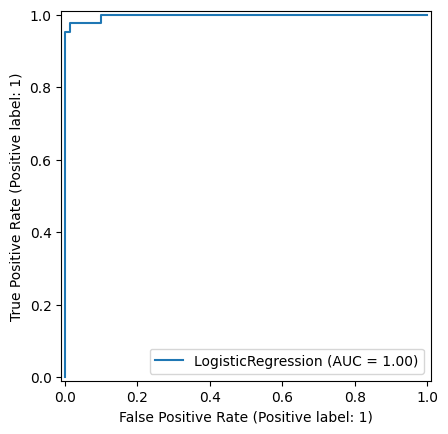

In [73]:
# Display ROC curve
roc_display = RocCurveDisplay.from_estimator(lr, X_test_scaled, y_test)

In [75]:
ra=roc_auc
print("ROC-AUC Score:", ra)

ROC-AUC Score: 0.99737962659679


 5.Tune threshold and explain sigmoid function

In [76]:
import numpy as np

In [77]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [78]:
# Get predicted probabilities for the positive class
y_prob = lr.predict_proba(X_test_scaled)[:, 1]

In [79]:
# Define thresholds to test
thresholds = [0.4, 0.5, 0.6]
results = []

# Evaluate performance at each threshold
for thresh in thresholds:
    y_pred_thresh = (y_prob >= thresh).astype(int)
    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    results.append((thresh, precision, recall, f1))

# Convert to DataFrame for display
results_df = pd.DataFrame(results, columns=["Threshold", "Precision", "Recall", "F1 Score"])
results_df

,Threshold,Precision,Recall,F1 Score
0,0.4,0.976744,0.976744,0.976744
1,0.5,0.976190,0.953488,0.964706
2,0.6,1.000000,0.953488,0.976190
